In [1]:
#imports
import pandas as pd
import os
from dotenv import load_dotenv
from utils.helpers import *

# Load environment variables
load_dotenv()

# Read CSV file
df = pd.read_csv(os.environ['TRAIN_LOCATION'])
# df = df.drop(columns=['id'])

# View result
print(df.info())
display(df.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
79155,79155,Shivansh,Male,43.0,Mumbai,Working Professional,Consultant,NaN,3.0,NaN,NaN,2.0,Less than 5 hours,Unhealthy,PhD,Yes,12.0,5.0,Yes,0
26631,26631,Aariv,Male,43.0,Pune,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,B.Ed,No,11.0,5.0,Yes,0
129627,129627,Ritika,Female,29.0,Vasai-Virar,Working Professional,Content Writer,NaN,2.0,NaN,NaN,1.0,More than 8 hours,Healthy,B.Ed,No,4.0,2.0,Yes,0
101331,101331,Mithila,Female,29.0,Kolkata,Working Professional,Teacher,NaN,4.0,NaN,NaN,4.0,7-8 hours,Moderate,BCA,No,0.0,4.0,Yes,0
117704,117704,Arav,Male,28.0,Vadodara,Student,NaN,1.0,NaN,7.43,4.0,NaN,7-8 hours,Moderate,MBBS,Yes,2.0,1.0,Yes,0


In [2]:
#Check for missing and duplicates
print(df.duplicated().sum()) # no duplicates
df.isna().sum() #We have alot of missing data that we will deal with in different ways

0


id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [3]:
from utils.helpers import preprocessing
df = preprocessing(df)
df

,id,gender,age,working_student,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,workstudy_hours,financial_stress,family_mental_illness,depression
0,0,-1.106796,0.695360,0.497344,-1.530845,-0.045698,1.589714,0.033784,0.018013,-0.772518,1.344780,1.256906,-0.623353,-0.988861,-1.363057,-0.699617,-0.994217,0
1,1,0.903508,-1.161867,0.497344,0.885525,-0.045698,0.795176,0.033784,0.018013,0.016183,-1.266667,-1.230634,0.486299,1.011265,0.193928,0.007793,-0.994217,1
2,2,0.903508,-0.596624,-2.010679,0.831828,3.194278,0.000638,1.869755,-1.632006,0.016183,-0.483233,1.256906,-1.067214,1.011265,-0.844062,-1.407027,-0.994217,1
3,3,0.903508,-1.484863,0.497344,0.885525,-0.045698,1.589714,0.033784,0.018013,-1.561219,-1.266667,0.013136,-0.808295,1.011265,0.972421,-1.407027,1.005816,1
4,4,-1.106796,-0.838871,0.497344,-1.584542,-0.045698,-1.588437,0.033784,0.018013,-1.561219,-0.483233,-1.230634,-0.808295,1.011265,0.712923,0.715203,1.005816,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,-1.106796,-1.807859,0.497344,1.046616,-0.045698,1.589714,0.033784,0.018013,0.804884,-0.483233,-1.230634,-0.179492,-0.988861,-1.103560,0.715203,1.005816,1
140696,140696,-1.106796,0.049368,0.497344,-1.262359,-0.045698,1.589714,0.033784,0.018013,0.804884,0.561346,0.013136,-0.956249,1.011265,-0.065570,1.422613,1.005816,0
140697,140697,-1.106796,-1.323365,0.497344,-0.027326,-0.045698,0.000638,0.033784,0.018013,-1.561219,1.344780,0.013136,-1.141191,-0.988861,-0.584565,0.715203,-0.994217,0
140698,140698,-1.106796,0.695360,0.497344,0.455948,-0.045698,1.589714,0.033784,0.018013,-0.772518,-0.483233,0.013136,1.263056,1.011265,0.972421,-1.407027,-0.994217,0


In [4]:
# #Now we want to split it into 2 datasets, students and workers
# students_df = df.loc[df["working_student"] == 0].drop({"working_student", "work_pressure", "job_satisfaction"}, axis=1)
# working_df = df.loc[df["working_student"] == 1].drop({"working_student", "study_satisfaction", "cgpa", "academic_pressure"}, axis=1)

# display(students_df)

In [5]:
# from OurModels import LogisticRegressionModel
# model = LogisticRegressionModel()
# results = model.train(df)
# model.report()

In [6]:
# newdf = pd.read_csv(os.environ["TEST_LOCATION"])
# newdf = preprocessing(newdf)

# test = model.predict(newdf)

# generate_submission(test, "logreg")
# print(test.shape)

In [7]:
# from OurModels import DecisionTreeClassifierModel
# model = DecisionTreeClassifierModel()
# results = model.train(df)
# # model.optimize(df)
# model.report()

In [8]:
# newdf = pd.read_csv(os.environ['TEST_LOCATION'])
# newdf = preprocessing(newdf)

# test = model.predict(newdf)

# generate_submission(test, "treeeeee")
# print(test.shape)

In [9]:
# print(test.shape)

In [10]:
# from OurModels import XGBoostModel
# model = XGBoostModel()
# results = model.train(df)
# model.report(*results)
# newdf = preprocessing(pd.read_csv(os.environ['TEST_LOCATION']))

# test = model.predict(newdf)

# generate_submission(test, "XBG")

In [11]:
from OurModels import NeuralNetwork
# Initialize and train
clf2 = NeuralNetwork()
X_train, X_test, y_train, y_test = clf2.prepare_data(df)
# clf2.build_model()
# clf2.train(
#     X_train,
#     y_train,
#     epochs=1
# )
# clf2.save()
clf2.load_our_model(
    os.environ["WEIGHT_FILE_LOCATION"]
)

clf2.model.predict(X_test[0:1], verbose=0)

results = clf2.evaluate(X_test, y_test)
print(results)

Model loaded from C:\Users\nikan\Desktop\Spring 2025\code\COS322-depression\data\Results\ModelWeights\model.keras
{'loss': 0.1560215950012207, 'accuracy': 0.9375621676445007}


In [ ]:
# 1. Load test CSV
test_df = pd.read_csv(os.environ["TEST_LOCATION"])

# 2. Save IDs
ids = test_df["id"].copy()

# 3. Drop ID column for model input
test_features = test_df.drop(columns=["id"])

# 4. Preprocess test features
X_test = preprocessing(test_features)

# 5. Predict probabilities
probs = clf2.model.predict(X_test).flatten()

# 6. Convert to binary labels using threshold
threshold = 0.45
binary_preds = (probs >= threshold).astype(int)

# 7. Build submission DataFrame
submission_df = pd.DataFrame({
    "id": ids,
    "depression": binary_preds
})

# 8. Save submission
generate_submission(submission_df, "NN")


2932/2932 ━━━━━━━━━━━━━━━━━━━━ 2s 752us/step
Submission saved to: C:\Users\nikan\Desktop\Spring 2025\code\COS322-depression\data\Results\submissions\submission_NN_140700.csv


880/880 ━━━━━━━━━━━━━━━━━━━━ 1s 597us/step


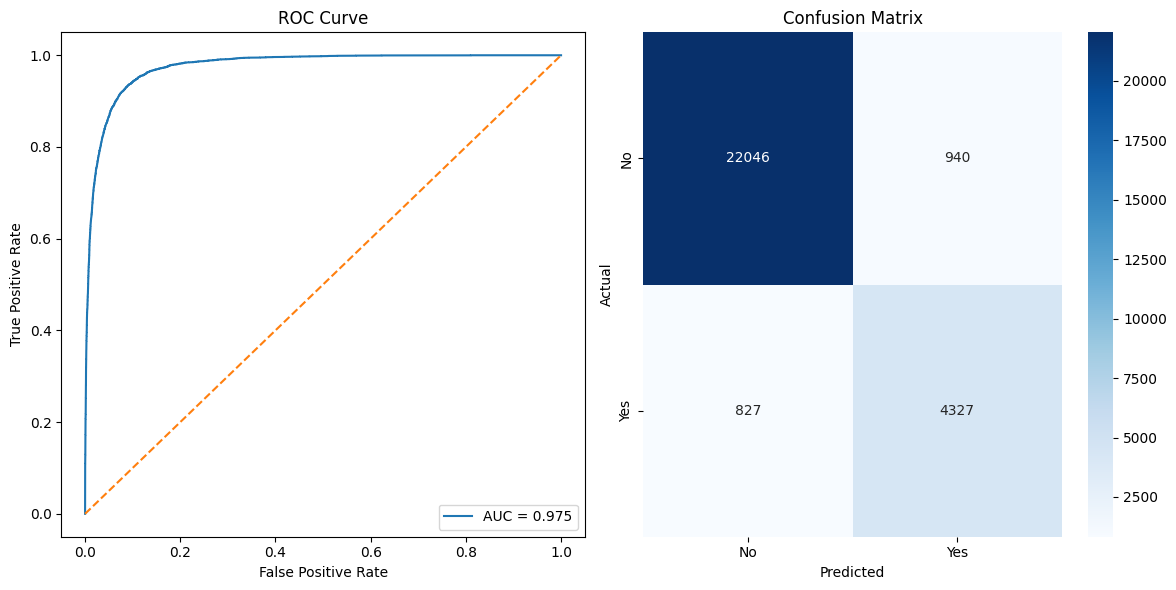

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     22986
           1       0.82      0.84      0.83      5154

    accuracy                           0.94     28140
   macro avg       0.89      0.90      0.90     28140
weighted avg       0.94      0.94      0.94     28140

Accuracy: 0.9372


In [ ]:
# get raw probabilities
y_scores = clf2.model.predict(X_test).flatten()

# convert to probabilities of positive class if softmax
if y_scores.ndim > 1:
    y_scores = y_scores[:, 1]

# threshold
y_pred = (y_scores >= threshold).astype(int)

clf2.report(y_pred, y_test, y_scores)

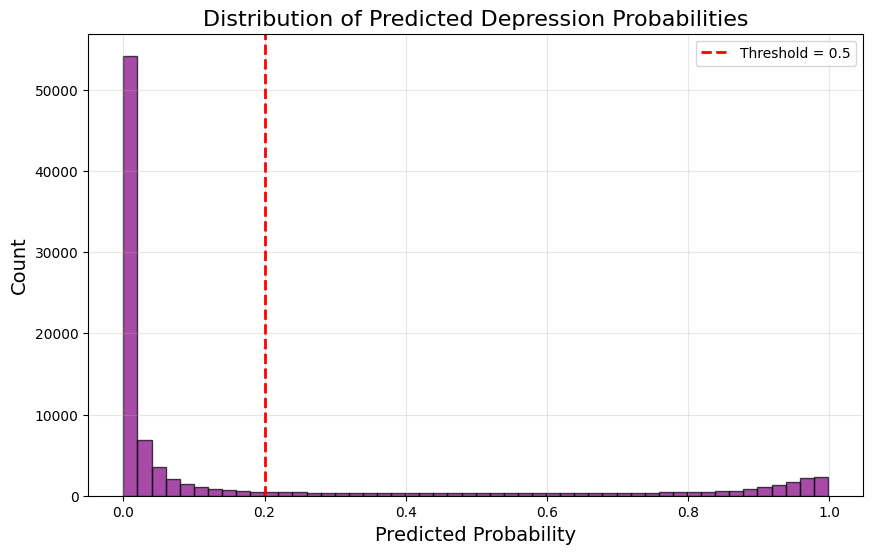

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,6))
plt.hist(probs, bins=50, color='purple', edgecolor='black', alpha=0.7)
plt.axvline(threshold, color='red', linestyle='--', linewidth=2,  label=f'Threshold = {threshold}')

plt.title("Distribution of Predicted Depression Probabilities", fontsize=16)
plt.xlabel("Predicted Probability", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)

plt.show()


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from OurModels.neural_viz import NeuralNetworkVisualizer
from IPython.display import display, HTML

# 1. Setup (Same as before)
yes_indices = np.where(y_test == 0)[0]
target_index = yes_indices[0]
print(f"Visualizing Test Sample at index {target_index} (Actual Label: Yes)")

sample_person = X_test.iloc[target_index].values
feature_list = X_test.columns.tolist()

# 2. Initialize Visualizer
viz = NeuralNetworkVisualizer(
    clf2.model, 
    feature_names=feature_list,
    class_labels=["No Depression", "Depression"]
)

# 3. Generate the animation object
# (Since we changed the function in Step 1, 'anim_object' is now the raw animation, not HTML)
anim_object = viz.create_animation(sample_person)

# 4. Save as MP4
# fps=30 makes it smooth. You can lower this number to make it slower.
print("Saving video... this may take a moment.")
anim_object.save("neural_network_activity.gif", writer="pillow", fps=1)
print("Video saved successfully as 'neural_network_activity.mp4'")

# 5. (Optional) Display in notebook as well
# If you still want to see it in the notebook, convert it to HTML here manually
display(HTML(anim_object.to_jshtml()))

Visualizing Test Sample at index 0 (Actual Label: Yes)
Saving video... this may take a moment.
Video saved successfully as 'neural_network_activity.mp4'
